In [2]:
!pip install keras

In [3]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
import keras

Using TensorFlow backend.


In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
import numpy
from keras.preprocessing.image import ImageDataGenerator

In [6]:
img_gen=ImageDataGenerator(rescale=1/255)
img_gen.flow_from_directory("mnist_data/trainingSet/")
img_gen.flow_from_directory("mnist_data/validatingSet/")

Found 37940 images belonging to 10 classes.
Found 4060 images belonging to 10 classes.


In [7]:
!pip install flask


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras import optimizers

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(2,2),input_shape=(28,28,1),activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
flatten_2 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               5537920   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 5,555,242
Trainable params: 5,555,242
Non-trainable params: 0
_________________________________________________________________


In [23]:
input_shape=(28,28,1)

In [24]:
train_img_gen=img_gen.flow_from_directory('mnist_data/trainingSet/',target_size=input_shape[:2],batch_size=16,class_mode='categorical',color_mode='grayscale')
validate_img_gen=img_gen.flow_from_directory('mnist_data/validatingSet/',target_size=input_shape[:2],batch_size=16,class_mode='categorical',color_mode='grayscale')

Found 37940 images belonging to 10 classes.
Found 4060 images belonging to 10 classes.


In [25]:
train_img_gen.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [26]:
history=model.fit_generator(train_img_gen,validation_data=validate_img_gen, validation_steps=12,epochs=2,steps_per_epoch=100)

Epoch 1/2
100/100 [==============================] - 16s 156ms/step - loss: 0.8111 - acc: 0.7362 - val_loss: 0.5122 - val_acc: 0.8542
Epoch 2/2
100/100 [==============================] - 14s 140ms/step - loss: 0.3192 - acc: 0.9044 - val_loss: 0.2640 - val_acc: 0.9323


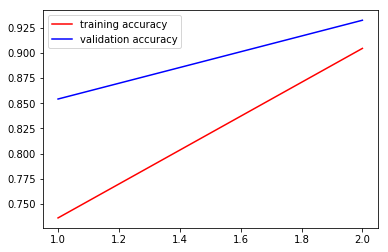

In [27]:
acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'red',label='training accuracy')
plt.plot(epochs,val_acc,'blue',label='validation accuracy')
plt.legend()
plt.legend()

In [28]:
model.save('new_model.h5')

In [29]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")